In [1]:
using Analytical, Plots, Plots.PlotMeasures, StatsPlots, LaTeXStrings, ProgressMeter, BenchmarkTools

# Analytical estimation

**Setting up model**

In [2]:
Analytical.changeParameters(gam_neg=-83,gL=10,gH=500,alLow=0.2,alTot=0.2,theta_f=1e-3,theta_mid_neutral=1e-3,al=0.184,be=0.000402,B=0.999,bRange=append!(collect(0.2:0.05:0.95),0.999),pposL=0.001,pposH=0.0,N=500,n=25,Lf=10^6,rho=0.001,TE=5.0,convoluteBinomial=true)

Dict{Float64,Array{Float64,2}} with 17 entries:
  0.95  => [1.0 0.948703 … 1.29963e-149 0.0; 0.0 0.0499844 … 6.16674e-145 0.0; …
  0.3   => [1.0 0.846246 … 1.39296e-124 0.0; 0.0 0.141513 … 2.08247e-120 0.0; ……
  0.45  => [1.0 0.894729 … 2.18461e-133 0.0; 0.0 0.0996357 … 4.90445e-129 0.0; …
  0.25  => [1.0 0.818402 … 1.26765e-120 0.0; 0.0 0.164338 … 1.57822e-116 0.0; ……
  0.35  => [1.0 0.866701 … 6.26034e-128 0.0; 0.0 0.124169 … 1.09243e-123 0.0; ……
  0.7   => [1.0 0.931015 … 5.5603e-143 0.0; 0.0 0.0665962 … 1.94332e-138 0.0; ……
  0.85  => [1.0 0.94284 … 3.38107e-147 0.0; 0.0 0.0555265 … 1.43526e-142 0.0; ……
  0.2   => [1.0 0.778313 … 8.88178e-116 0.0; 0.0 0.195556 … 8.83738e-112 0.0; ……
  0.9   => [1.0 0.94593 … 1.94033e-148 0.0; 0.0 0.0526101 … 8.72176e-144 0.0; ……
  0.65  => [1.0 0.925906 … 2.26116e-141 0.0; 0.0 0.0713333 … 7.33748e-137 0.0; …
  0.8   => [1.0 0.939376 … 7.00649e-146 0.0; 0.0 0.0587845 … 2.79909e-141 0.0; …
  0.5   => [1.0 0.904747 … 1.1259e-135 0.0; 0.0 0.090656 … 2.

Solving $\alpha_{(x)}$ to show asymptotic behaviour taking into account weakly benefical alleles

In [3]:
Analytical.set_theta_f()
theta_f = adap.theta_f
adap.B = 0.999
Analytical.set_theta_f()
Analytical.setPpos()
adap.theta_f = theta_f
adap.B= 0.999

x,y = Analytical.analyticalAlpha(gammaL=adap.gL,gammaH=adap.gH,pposL=adap.pposL,pposH=adap.pposH)

([-0.221219; -0.0986507; … ; 0.0619683; 0.0528265], [-0.203872; -0.079337; … ; 0.196603; 0.19785])

Plotting the results. $x$ contains $\alpha_{(x)}$ accounting for weakly beneficial alleles. $y$ contains the true value of $\alpha_{(x)}$, not accounting for weakly beneficial alleles.


┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: Symbol[:identity, :log10]
└ @ Plots /home/jmurga/.julia/packages/Plots/yuTb4/src/args.jl:1179
┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: Symbol[:identity, :log10]
└ @ Plots /home/jmurga/.julia/packages/Plots/yuTb4/src/args.jl:1179


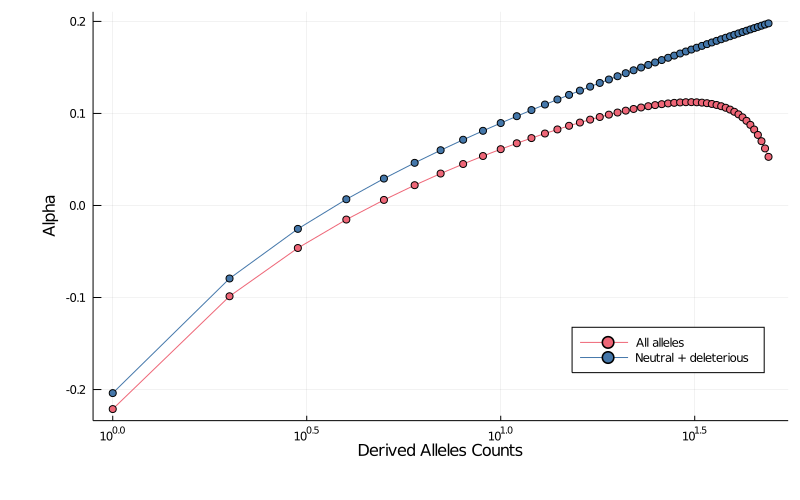

In [4]:
Plots.gr()
Plots.theme(:wong)

Plots.plot(collect(1:size(x,1)),hcat(x,y),
    legend = :bottomright,
    seriestype = :line,
    xlabel = "Derived Alleles Counts",
    ylabel = "Alpha",
    label = ["All alleles" "Neutral + deleterious"],
    markershapes= [:circle :circle],
    linecolor=["#ee6677" "#4477aa"],
    markercolor=["#ee6677" "#4477aa"],
    lw = 1,
    xscale = :log,
    bottom_margin=10 * Plots.PlotMeasures.mm,
    left_margin=10 * Plots.PlotMeasures.mm,
    size=(800,500)
)

# Empirical case

In this example we provide a solution to replicate results at [Uricchio et al. 2019](https://doi.org/10.1038/s41559-019-0890-6). We will simulate $10^6$ summary statistics from random *DFE* to use as prior distribution in *ABCreg*. In this case we will need a set of empirical observed values in order to subset the summary statistics.

In [5]:
Analytical.changeParameters(N=1000,n=661,convoluteBinomial=true)

Dict{Float64,Array{Float64,2}} with 17 entries:
  0.95  => [1.0 0.498589 … 0.0 0.0; 0.0 0.347096 … 0.0 0.0; … ; 0.0 0.0 … 0.347…
  0.3   => [1.0 0.110232 … 0.0 0.0; 0.0 0.243282 … 0.0 0.0; … ; 0.0 0.0 … 0.243…
  0.45  => [1.0 0.229993 … 0.0 0.0; 0.0 0.33821 … 0.0 0.0; … ; 0.0 0.0 … 0.3382…
  0.25  => [1.0 0.0708885 … 0.0 0.0; 0.0 0.187805 … 0.0 0.0; … ; 0.0 0.0 … 0.18…
  0.35  => [1.0 0.151084 … 0.0 0.0; 0.0 0.28574 … 0.0 0.0; … ; 0.0 0.0 … 0.2857…
  0.7   => [1.0 0.388826 … 0.0 0.0; 0.0 0.367425 … 0.0 0.0; … ; 0.0 0.0 … 0.367…
  0.85  => [1.0 0.459381 … 0.0 0.0; 0.0 0.357446 … 0.0 0.0; … ; 0.0 0.0 … 0.357…
  0.2   => [1.0 0.0365477 … 0.0 0.0; 0.0 0.121093 … 0.0 0.0; … ; 0.0 0.0 … 0.12…
  0.9   => [1.0 0.479674 … 0.0 0.0; 0.0 0.35249 … 0.0 0.0; … ; 0.0 0.0 … 0.3524…
  0.65  => [1.0 0.361565 … 0.0 0.0; 0.0 0.367966 … 0.0 0.0; … ; 0.0 0.0 … 0.367…
  0.8   => [1.0 0.437574 … 0.0 0.0; 0.0 0.361772 … 0.0 0.0; … ; 0.0 0.0 … 0.361…
  0.5   => [1.0 0.266425 … 0.0 0.0; 0.0 0.352567 … 0.0 0.0; …

Once the model account for the number of samples we can open the files. The function `Analytical.parseSfs` will return polymorphic and divergent counts and SFS accounting for the whole spectrum: `collect(1:adap.nn)/adap.nn`. In addition an output file will be created contained the observed values to input in *ABCreg*

In [6]:
path= "/home/jmurga/mktest/data/";suffix="txt";
files = path .* filter(x -> occursin(suffix,x), readdir(path))

empiricalValues = Analytical.parseSfs(data=files,output="data.tsv",sfsColumns=[3,5],divColumns=[6,7])

3-element Array{Array{Int64,N} where N,1}:
 [151646, 37604]                                
 [151646 37604; 34219 8190; … ; 302 67; 890 205]
 [73191, 17491]                                 

We make a function to perform $10^6$ simulated values. We solve the analytical approximation taking into account totally random and independent to draw *DFE* and $\alpha_{(x)}$. Each parameters combination are replicated to 5% frequency bins background selection values (saved at `adap.bRange`). 

In Julia you can easily parallelize a loop using ```$ export JULIA_NUM_THREADS=8```. Each iteration will be executed in a thread. In order to check the threads configured, just use in the julia console ```julia> Threads.nthreads()``` before the execution. We compute this example in a Intel i7-7700HQ (8) @ 3.800GHz laptop with 16GB of RAM using 8 threads. Please check [parallelization manual] in order to send the process in a multicore system (or just put two process manually with the *alphaSumStats.jl*, an script provided to launch from command line).

In [7]:
using Base.Threads

In [8]:
function summStats(iter,data)
#@threads
    for i in 1:iter
        
        gam_neg=-rand(80:400)
        gL=rand(10:20)
        gH=rand(200:500)
        alLow=rand(collect(0.0:0.1:0.2))
        alTot=rand(collect(0.0:0.2:0.2))

        for j in adap.bRange
            Analytical.changeParameters(gam_neg=gam_neg,gL=gL,gH=gH,alLow=alLow,alTot=alTot,theta_f=1e-3,theta_mid_neutral=1e-3,al=0.184,be=0.000402,B=j,bRange=adap.bRange,pposL=0.001,pposH=0.0,N=1000,n=661,Lf=10^6,rho=adap.rho,TE=5.0,diploid=true,convoluteBinomial=false)

            Analytical.set_theta_f()
            theta_f = adap.theta_f
            adap.B = 0.999
            Analytical.set_theta_f()
            Analytical.setPpos()
            adap.theta_f = theta_f
            adap.B = j

            x,y,z= Analytical.alphaByFrequencies(gammaL=adap.gL,gammaH=adap.gH,pposL=adap.pposL,pposH=adap.pposH,observedData=data)
            Analytical.summaryStatistics("/home/jmurga/prior.csv", z)
            
        end
    end
end

summStats (generic function with 1 method)

Required time to execute one solution (17 iterations, one per $B$ value). Times mostly depends on sample size.

In [9]:
@btime summStats(1,empiricalValues)

  218.234 ms (1318209 allocations: 147.38 MiB)


One random solution to summary statistics. Solving with two empirical subset.

In [10]:
gam_neg=-rand(80:400)
gL=rand(10:20)
gH=rand(100:500)
alLow=rand(collect(0.0:0.1:0.4))
alTot=rand(collect(0.1:0.1:0.4))

j = 0.999
Analytical.changeParameters(gam_neg=gam_neg,gL=gL,gH=gH,alLow=alLow,alTot=alTot,theta_f=1e-3,theta_mid_neutral=1e-3,al=0.184,be=0.000402,B=j,bRange=adap.bRange,pposL=0.001,pposH=0.0,N=1000,n=661,Lf=10^6,rho=0.001,TE=5.0,diploid=true,convoluteBinomial=false)

Analytical.set_theta_f()
theta_f = adap.theta_f
adap.B = 0.999
Analytical.set_theta_f()
Analytical.setPpos()
adap.theta_f = theta_f
adap.B = j

x,y,z= Analytical.alphaByFrequencies(gammaL=adap.gL,gammaH=adap.gH,pposL=adap.pposL,pposH=adap.pposH,observedData=empiricalValues)

([-0.51966 -0.569356; -0.331298 -0.372521; … ; -0.0059172 0.112145; -0.00405281 0.110232], [-0.500763 -0.487452; -0.315529 -0.319156; … ; 0.029999 0.104711; 0.0302355 0.105551], [42079.0 31411.0 … 0.0342883 0.0302355; 10011.0 7420.0 … -0.00468047 0.105551])

Example of summary statistic values

In [11]:
z

2×27 Array{Float64,2}:
 42079.0  31411.0  154564.0  175336.0  …  -0.00405281   0.0342883   0.0302355
 10011.0   7420.0   35641.0   41457.0      0.110232    -0.00468047  0.105551 

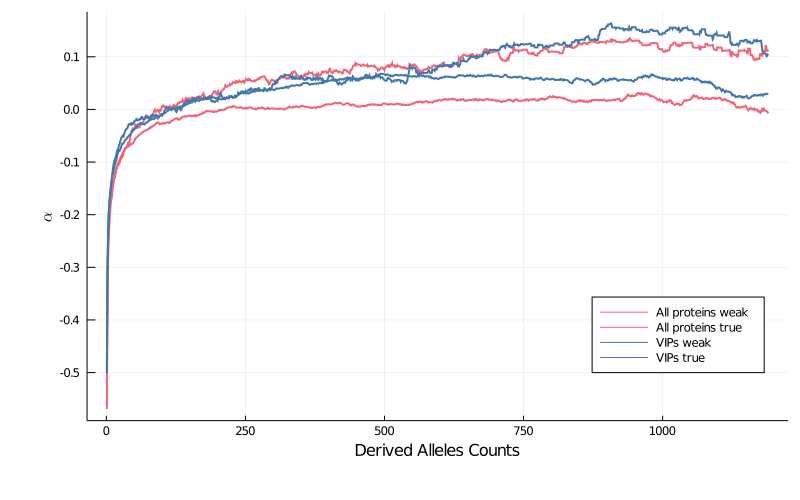

In [12]:
Plots.gr()
Plots.theme(:wong)

Plots.plot(collect(1:size(x,1)),hcat(x,y),
    legend = :bottomright,
    seriestype = :line,
    xlabel = "Derived Alleles Counts",
    ylabel = L"\alpha",
    label = ["All proteins weak" "All proteins true" "VIPs weak" "VIPs true"],
    #markershapes= [:circle :circle :cross :cross],
    linecolor=["#ee6677" "#ee6677" "#4477aa" "#4477aa"],
    #markercolor=["#ee6677" "#4477aa"],
    lw = 2,
    #xscale = :log,
    bottom_margin=10 * Plots.PlotMeasures.mm,
    left_margin=10 * Plots.PlotMeasures.mm,
    size=(800,500)
)

Once we have the summary statistics we perform the *ABC* estimation.

# ABC inference

*ABCreg* will output one file per line in data. The files contain the posterior distributions. We return the posterior distributions, mean and quantiles.

You can easily plot the posterior distributions using Julia or just input the files at your favorite plot software. We implement a little function using *Plots* and *StatsPlots*

In [13]:
function plotPosterior(data)

    Plots.gr()
    Plots.theme(:wong2)

    p1 = StatsPlots.density(data,
                            fill=(0, 0.5),
                            #25, 52,
                            linecolor=["#00293C" "#1E656D" "#F62A00"],
                            fillcolor=["#00293C" "#1E656D" "#F62A00"],
                            lw = 1
                        )
    return p1
    end

plotPosterior (generic function with 1 method)

## Replicating paper's results. Tolerance set such that $10^3$ acceptances are recorded for the regression.

In [14]:
posterior, result = Analytical.ABCreg(data="/home/jmurga/dataAbc/data.tsv",prior="/home/jmurga/dataAbc/prior.tsv", nparams=3, nsummaries=24, outputPath="/home/jmurga/dataAbc/", outputPrefix="outPaper", tolerance=0.0005, regressionMode="T",regPath="/home/jmurga/ABCreg/src/reg")

(Array{Float64,2}[[0.186198 0.212112 0.326795; 0.181442 0.213976 0.325107; … ; 0.1706 0.256938 0.337458; 0.183508 0.232214 0.333727], [0.293475 0.283941 0.392754; 0.325769 0.200413 0.393268; … ; 0.316663 0.119557 0.374997; 0.326207 0.171429 0.390842]], Array{Float64,2}[[0.200565 0.221014 0.338111; 0.176143 0.166272 0.320971; 0.22328 0.274471 0.3539], [0.316262 0.17126 0.384126; 0.29007 0.0305662 0.363251; 0.33868 0.305501 0.400954]])

In [15]:
p1 = plotPosterior(posterior[1]);

In [16]:
p2 = plotPosterior(posterior[2]);

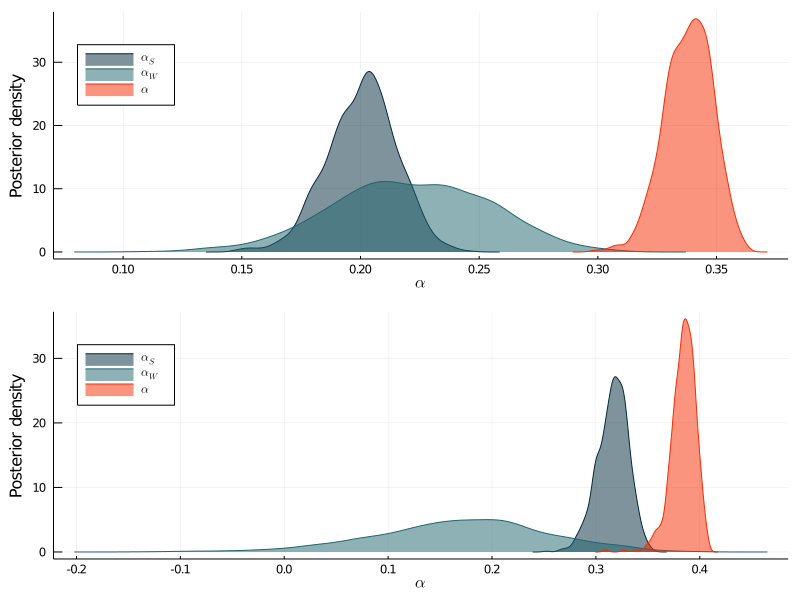

In [17]:
Plots.plot(p1,
    p2,
    xlabel = L"\alpha",
    label = [L"\alpha_S" L"\alpha_W" L"\alpha"],
    ylabel = "Posterior density",
    legend = :topleft,
    layout=(2,1),
    fmt = :svg,
    size=(800,600)
)

In [18]:
Plots.savefig("/home/jmurga/fig2.svg")